<a href="https://colab.research.google.com/github/Vengadore/Notebooks/blob/master/ROI_Map_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of recreation of images (ROI) in encoder

### Download and unzip data

In [ ]:
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/EbuCmWuONzlOocGn-QIvl8ABcSrMPxXVCngpbBfwfJ1BHQ?download=1"
!sudo chmod 777 "EbuCmWuONzlOocGn-QIvl8ABcSrMPxXVCngpbBfwfJ1BHQ?download=1"
!mv "EbuCmWuONzlOocGn-QIvl8ABcSrMPxXVCngpbBfwfJ1BHQ?download=1" "Diabetic_retinopathy.zip"
!unzip Diabetic_retinopathy.zip
!rm Diabetic_retinopathy.zip

--2020-09-02 06:06:37--  https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/EbuCmWuONzlOocGn-QIvl8ABcSrMPxXVCngpbBfwfJ1BHQ?download=1
Resolving correoipn-my.sharepoint.com (correoipn-my.sharepoint.com)... 13.107.136.9
Connecting to correoipn-my.sharepoint.com (correoipn-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/ccarrillog1400_alumno_ipn_mx/Documents/Data%20Bases/Other%20Databases/Diabetic_retinopathy.zip?&originalPath=aHR0cHM6Ly9jb3JyZW9pcG4tbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvY2NhcnJpbGxvZzE0MDBfYWx1bW5vX2lwbl9teC9FYnVDbVd1T056bE9vY0duLVFJdmw4QUJjU3JNUHhYVkNuZ3BiQmZ3ZkoxQkhRP3J0aW1lPWJXYXZZQVpQMkVn [following]
--2020-09-02 06:06:48--  https://correoipn-my.sharepoint.com/personal/ccarrillog1400_alumno_ipn_mx/Documents/Data%20Bases/Other%20Databases/Diabetic_retinopathy.zip?&originalPath=aHR0cHM6Ly9jb3JyZW9pcG4tbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvY2NhcnJpbGxvZzE0MD

### Load packages to use

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

### Load data

In [ ]:
path = "./"
data = pd.read_csv(os.path.join(path,"Diabetic_retinopathy.csv"))
data.head()

,File_Name
0,01_dr.JPG
1,02_dr.JPG
2,03_dr.JPG
3,04_dr.JPG
4,05_dr.JPG


In [ ]:
## Add full path to data
Original_Column = 'File_Name'

data[Original_Column] = data[Original_Column].apply(lambda x : os.path.join(os.path.join(path,"DIABETIC RETINOPATHY"),x))
data.head()

,File_Name
0,./DIABETIC RETINOPATHY/01_dr.JPG
1,./DIABETIC RETINOPATHY/02_dr.JPG
2,./DIABETIC RETINOPATHY/03_dr.JPG
3,./DIABETIC RETINOPATHY/04_dr.JPG
4,./DIABETIC RETINOPATHY/05_dr.JPG


In [ ]:
## Split dataset in training and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.1, random_state=42)

## Generator

Download the package from the repository

In [ ]:
!git clone "https://github.com/Vengadore/Segmentation_OPTOS.git"

Cloning into 'Segmentation_OPTOS'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 68 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [ ]:
"""from Segmentation_OPTOS.Tools.Generators import Patch_generator
Train_generator = Patch_generator.Generator_from_DataFrame(train,patch_size = [64,64],
                                                           X = Original_Column,
                                                           y = Output_Column,
                                                           n_patches = 300)

Test_generator = Patch_generator.Generator_from_DataFrame(test,patch_size = [64,64],
                                                           X = Original_Column,
                                                           y = Output_Column,
                                                           n_patches = 300)"""

'from Segmentation_OPTOS.Tools.Generators import Patch_generator\nTrain_generator = Patch_generator.Generator_from_DataFrame(train,patch_size = [64,64],\n                                                           X = Original_Column,\n                                                           y = Output_Column,\n                                                           n_patches = 300)\n\nTest_generator = Patch_generator.Generator_from_DataFrame(test,patch_size = [64,64],\n                                                           X = Original_Column,\n                                                           y = Output_Column,\n                                                           n_patches = 300)'

In [ ]:
## Load data into memory, resize to (224,224,3)
X_train = []
for File in train.iterrows():
  I = cv2.imread(File[1].File_Name)
  I = cv2.resize(I,(512,512))
  I = cv2.normalize(I, None, alpha=0,  # Normalize image to fit from 0 to 1
                          beta=1,
                          norm_type=cv2.NORM_MINMAX,
                          dtype=cv2.CV_32F)
  X_train.append(I)
X_train = np.array(X_train)
y_train = X_train.copy()

X_test = []
for File in test.iterrows():
  I = cv2.imread(File[1].File_Name)
  I = cv2.resize(I,(512,512))
  I = cv2.normalize(I, None, alpha=0,  # Normalize image to fit from 0 to 1
                          beta=1,
                          norm_type=cv2.NORM_MINMAX,
                          dtype=cv2.CV_32F)
  X_test.append(I)
X_test = np.array(X_test)
y_test = X_test.copy() 


## Creation of the network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Dense,BatchNormalization,Flatten,MaxPool2D
from tensorflow.keras.models import Model

In [ ]:
encoder = Sequential()
encoder.add(Conv2D(256,[3,3],strides = (1,1),activation='relu',input_shape = (512,512,3)))
encoder.add(BatchNormalization())
encoder.add(Conv2D(128,[3,3],strides = (1,1),activation='relu'))
encoder.add(BatchNormalization())
encoder.add(Conv2D(64,[3,3],strides = (1,1),activation='relu'))
encoder.add(BatchNormalization())
encoder.add(MaxPool2D(pool_size=(2,2)))

encoder.compile(optimizer = 'adam',loss = 'binary_crossentropy')
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 256)     7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 510, 510, 256)     1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 128)     295040    
_________________________________________________________________
batch_normalization_1 (Batch (None, 508, 508, 128)     512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 506, 506, 64)      73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 506, 506, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 253, 253, 64)      0

In [ ]:
decoder = Sequential()
decoder.add(Conv2DTranspose(64,[3,3],strides = (1,1),activation = 'relu',input_shape = (109,109,64)))
decoder.add(Conv2DTranspose(64,[3,3],strides = (2,2),activation = 'relu',padding = 'same'))
decoder.add(Conv2DTranspose(128,[3,3],strides = (1,1),activation = 'relu',padding = 'same'))
decoder.add(Conv2DTranspose(256,[3,3],strides = (1,1),activation = 'relu'))
decoder.add(Conv2DTranspose(3,[1,1],strides = (1,1),activation = 'sigmoid'))

decoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 111, 111, 64)      36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 222, 222, 64)      36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 222, 222, 128)     73856     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 224, 224, 256)     295168    
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 224, 224, 3)       771       
Total params: 443,651
Trainable params: 443,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Network = Sequential([encoder,decoder])
Network.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])
Network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 253, 253, 64)      377792    
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       443651    
Total params: 821,443
Trainable params: 820,547
Non-trainable params: 896
_________________________________________________________________


In [ ]:
history = Network.fit(X_train,y_train,
                    batch_size = 4,
                    epochs = 100,
                    validation_data=(X_test, y_test))


Epoch 1/100
108/108 [==============================] - 307s 3s/step - loss: 0.3767 - accuracy: 0.6537 - jaccard_distance_loss: 0.7415 - val_loss: 0.5233 - val_accuracy: 0.6564 - val_jaccard_distance_loss: 1.1172
Epoch 2/100
 14/108 [==>...........................] - ETA: 3:59 - loss: 0.3650 - accuracy: 0.7930 - jaccard_distance_loss: 0.7197

KeyboardInterrupt: ignored

In [ ]:
## Save network
!mkdir -p saved_model
Network.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
## Load model
import tensorflow as tf
Network = tf.keras.models.load_model('saved_model/my_model/')


ValueError: ignored

In [ ]:
R = Network.predict_on_batch(X_train[:10])

In [ ]:
R.shape

(10, 512, 512, 3)

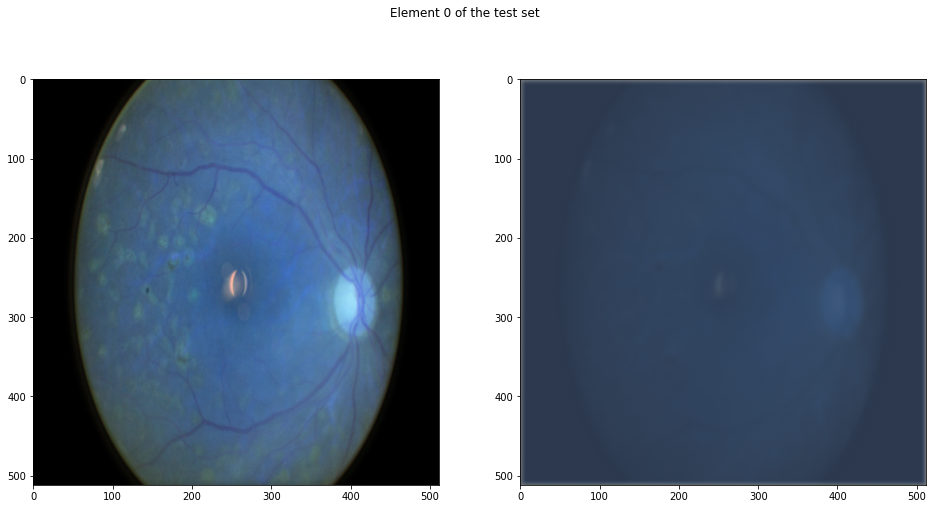

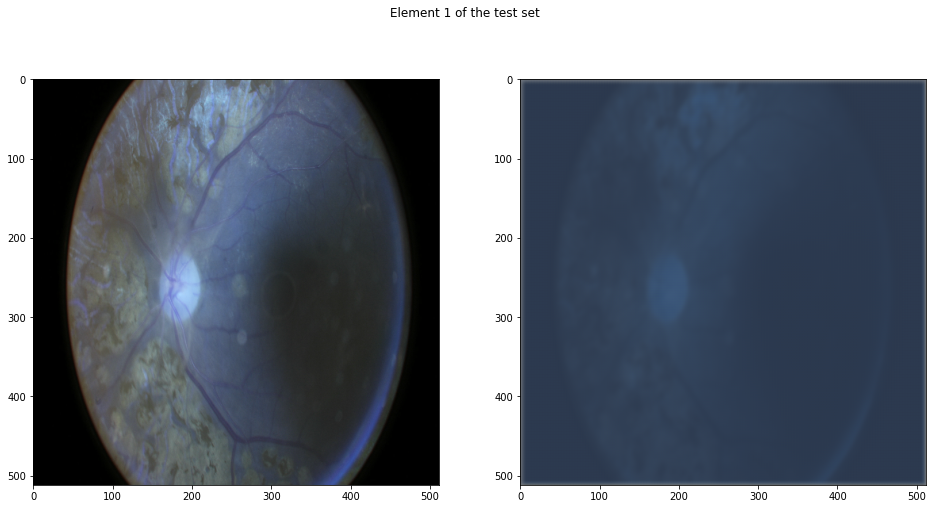

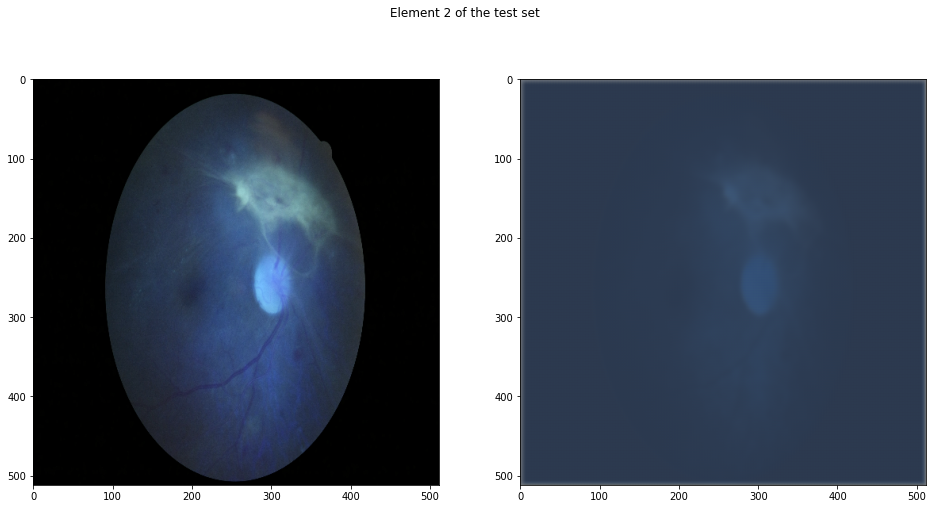

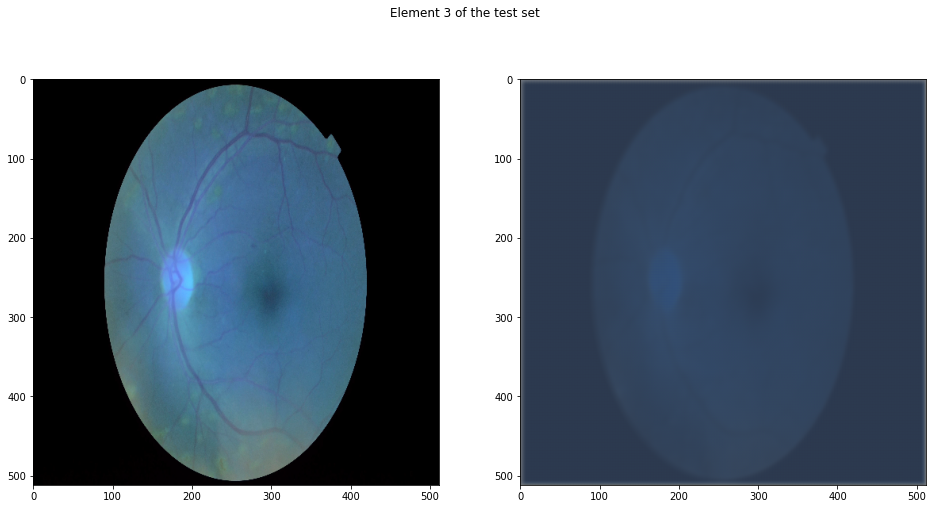

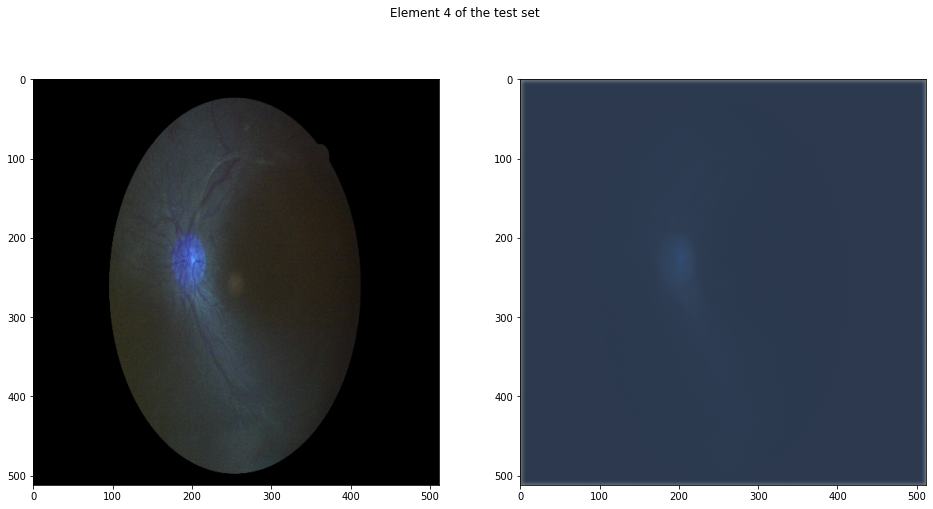

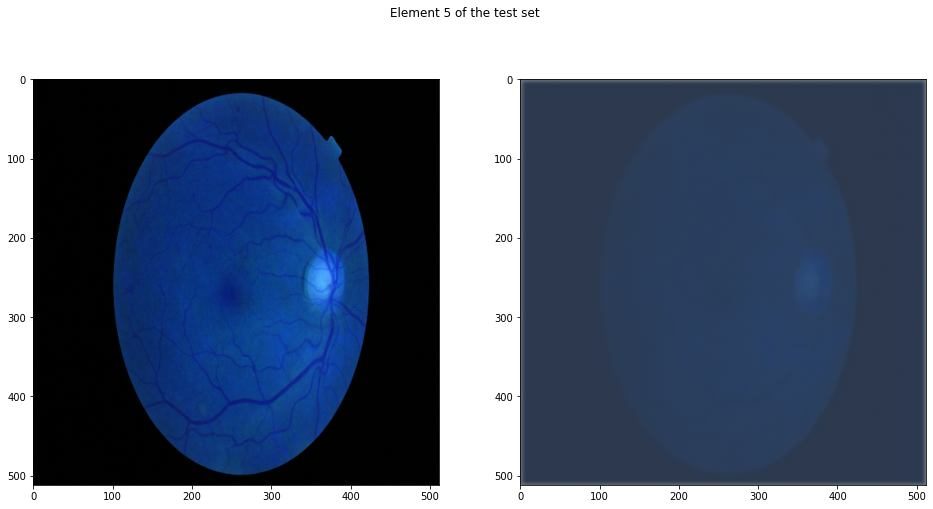

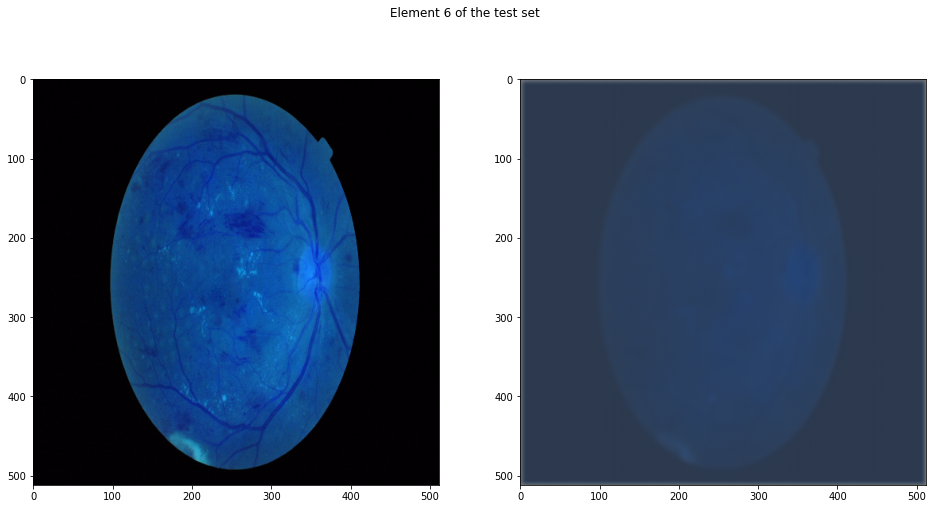

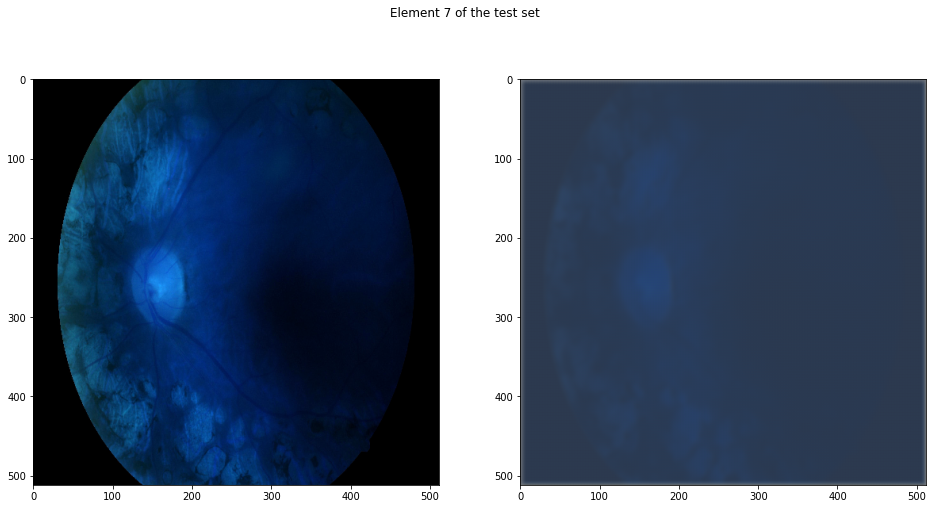

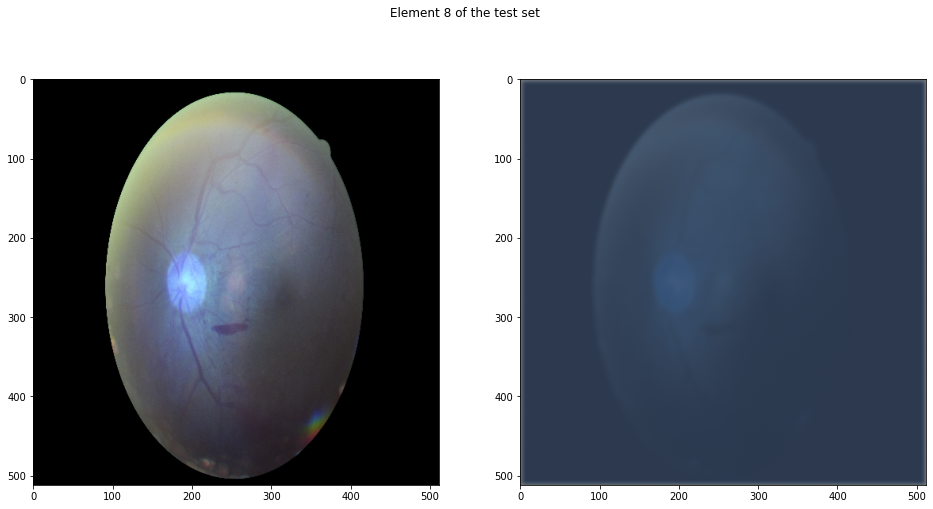

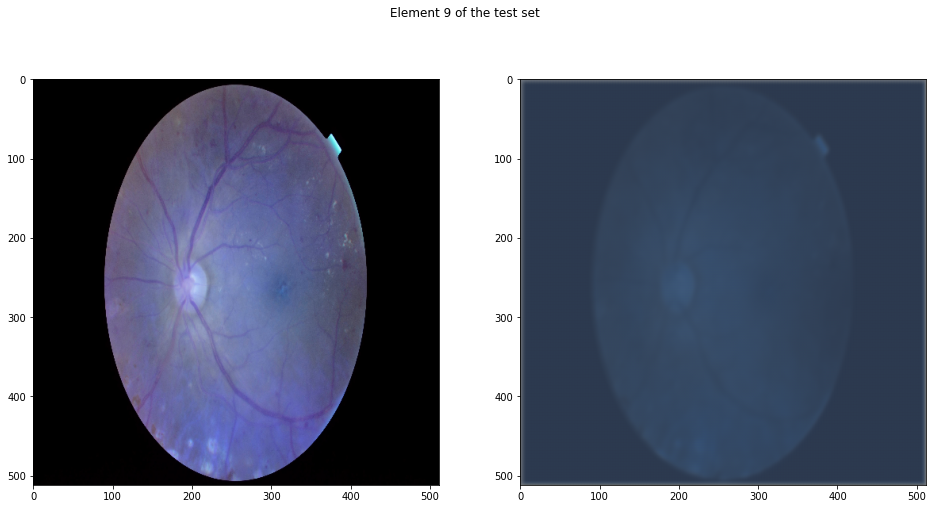

In [ ]:
for n in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
    fig.suptitle(f"Element {n} of the test set")
    ax1.imshow(X_train[n])
    ax2.imshow(R[n])

## Operation in the whole image

In [ ]:
Image1 = cv2.imread(test['Original'].iloc[2])

In [ ]:
# Compute the output of the network given the original image
I1_generator = Patch_generator.Image2Generator(Image1,patch_size=[64,64],batch_size=300)
I1 = Patch_generator.Generator2Image(Network,I1_generator)

# Resize the first image to a second image to create a bigger array, then place the original in the new array
scale_percent = 110 # percent of original size
width = int(Image1.shape[1] * scale_percent / 100)
height = int(Image1.shape[0] * scale_percent / 100)
dim = (width, height) 
Image2 = 0*cv2.resize(Image1, dim) 
Image2[32:I1_generator.M+32,32:I1_generator.N+32,:] = Image1
I2_generator = Patch_generator.Image2Generator(Image2,patch_size=[64,64],batch_size=300)
I2 = Patch_generator.Generator2Image(Network,I2_generator)
I2 = I2[32:I1_generator.M+32,32:I1_generator.N+32]

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(I1)
plt.figure(figsize=(16,16))
plt.imshow(I2)

In [ ]:
plt.figure(figsize=(16,16))
I = (100*I1*100*I2)**2
plt.imshow(I)

In [ ]:
## Applying a cross kernel with erosion to remove grid
kernel = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                   [1,1,1,1,1],
                   [0,0,1,0,0],
                   [0,0,1,0,0]],dtype = np.uint8)
erosion = cv2.erode(I,kernel,iterations = 2)
plt.figure(figsize=(16,16))
plt.imshow(erosion)

In [ ]:
## Applying a cross kernel with erosion to remove grid
kernel = np.array([[1,0,0,0,1],
                   [0,1,0,1,0],
                   [0,0,1,0,0],
                   [0,1,0,1,0],
                   [1,0,0,0,1]],dtype = np.uint8)
dilate = cv2.dilate(I,kernel,iterations = 1)
plt.figure(figsize=(16,16))
plt.imshow(dilate)

In [ ]:
image = I.copy()
image *= 255.0/image.max() 
image = image.astype(np.uint8)
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

In [ ]:
plt.figure(figsize = (16,16))
plt.imshow(th3)